In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#pip install shap

In [3]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [4]:
file_path = "20_Group_4_Final_Project/Resources/modern_season_stats_clean.csv"
seasons_df = pd.read_csv(file_path)
seasons_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,id,AllStar
0,1980,Kareem Abdul-Jabbar,C,32,LAL,82,0,3143,25.3,0.639,...,696,886,371,81,280,297,216,2034,0,1
1,1980,Tom Abernethy,PF,25,GSW,67,0,1222,11.0,0.511,...,129,191,87,35,12,39,118,362,1,0
2,1980,Alvan Adams,C,25,PHO,75,0,2168,19.2,0.571,...,451,609,322,108,55,218,237,1118,2,0
3,1980,Tiny Archibald,PG,31,BOS,80,80,2864,15.3,0.574,...,138,197,671,106,10,242,218,1131,3,1
4,1980,Dennis Awtrey,C,31,CHI,26,0,560,7.4,0.524,...,86,115,40,12,15,27,66,86,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,2017,Cody Zeller,PF,24,CHO,62,58,1725,16.7,0.604,...,270,405,99,62,58,65,189,639,18922,0
18923,2017,Tyler Zeller,C,27,BOS,51,5,525,13.0,0.508,...,81,124,42,7,21,20,61,178,18923,0
18924,2017,Stephen Zimmerman,C,20,ORL,19,0,108,7.3,0.346,...,24,35,4,2,5,3,17,23,18924,0
18925,2017,Paul Zipser,SF,22,CHI,44,18,843,6.9,0.503,...,110,125,36,15,16,40,78,240,18925,0


In [5]:
file_path2 = "20_Group_4_Final_Project/Resources/players_clean.csv"
player_shape_df = pd.read_csv(file_path2)
player_shape_df

,Player,height,weight,born,year_start,year_end,position
0,Curly Armstrong,71,170,1918,NaN,NaN,NaN
1,Cliff Barker,74,183,1921,NaN,NaN,NaN
2,Leo Barnhorst,76,190,1924,NaN,NaN,NaN
3,Ed Bartels,77,194,1925,NaN,NaN,NaN
4,Ralph Beard,70,174,1927,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3914,Troy Williams,78,214,1969,NaN,NaN,NaN
3915,Kyle Wiltjer,82,238,1992,2017.0,2017.0,F
3916,Stephen Zimmerman,84,238,1996,2017.0,2017.0,C
3917,Paul Zipser,80,214,1994,2017.0,2018.0,G


In [6]:
file_path3 = "20_Group_4_Final_Project/Resources/per_game_stats_clean.csv"
per_game_df = pd.read_csv(file_path3)
per_game_df

,Year,Player,Pos,MP(Game),Points(Game),Assists(Game),Rebounds(Game),Steals(Game),Blocks(Game),Turnover(Game),id
0,1980,Kareem Abdul-Jabbar,C,38.3,24.8,4.5,10.8,1.0,3.4,3.6,0
1,1980,Tom Abernethy,PF,18.2,5.4,1.3,2.9,0.5,0.2,0.6,1
2,1980,Alvan Adams,C,28.9,14.9,4.3,8.1,1.4,0.7,2.9,2
3,1980,Tiny Archibald,PG,35.8,14.1,8.4,2.5,1.3,0.1,3.0,3
4,1980,Dennis Awtrey,C,21.5,3.3,1.5,4.4,0.5,0.6,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
18922,2017,Cody Zeller,PF,27.8,10.3,1.6,6.5,1.0,0.9,1.0,18922
18923,2017,Tyler Zeller,C,10.3,3.5,0.8,2.4,0.1,0.4,0.4,18923
18924,2017,Stephen Zimmerman,C,5.7,1.2,0.2,1.8,0.1,0.3,0.2,18924
18925,2017,Paul Zipser,SF,19.2,5.5,0.8,2.8,0.3,0.4,0.9,18925


In [7]:
master_first_df = pd.merge(seasons_df, player_shape_df, how="left", on=["Player"])
master_first_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,PF,PTS,id,AllStar,height,weight,born,year_start,year_end,position
0,1980,Kareem Abdul-Jabbar,C,32,LAL,82,0,3143,25.3,0.639,...,216,2034,0,1,86,225,1947,NaN,NaN,NaN
1,1980,Tom Abernethy,PF,25,GSW,67,0,1222,11.0,0.511,...,118,362,1,0,79,218,1954,NaN,NaN,NaN
2,1980,Alvan Adams,C,25,PHO,75,0,2168,19.2,0.571,...,237,1118,2,0,81,209,1954,NaN,NaN,NaN
3,1980,Tiny Archibald,PG,31,BOS,80,80,2864,15.3,0.574,...,218,1131,3,1,73,150,1948,NaN,NaN,NaN
4,1980,Dennis Awtrey,C,31,CHI,26,0,560,7.4,0.524,...,66,86,4,0,82,234,1948,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,2017,Cody Zeller,PF,24,CHO,62,58,1725,16.7,0.604,...,189,639,18922,0,84,238,1992,2014.0,2018.0,C
18923,2017,Tyler Zeller,C,27,BOS,51,5,525,13.0,0.508,...,61,178,18923,0,84,251,1990,2013.0,2018.0,F
18924,2017,Stephen Zimmerman,C,20,ORL,19,0,108,7.3,0.346,...,17,23,18924,0,84,238,1996,2017.0,2017.0,C
18925,2017,Paul Zipser,SF,22,CHI,44,18,843,6.9,0.503,...,78,240,18925,0,80,214,1994,2017.0,2018.0,G


In [8]:
master_final_df = pd.merge(master_first_df, per_game_df, how="left", on=["id"])
master_final_df

,Year_x,Player_x,Pos_x,Age,Tm,G,GS,MP,PER,TS%,...,Year_y,Player_y,Pos_y,MP(Game),Points(Game),Assists(Game),Rebounds(Game),Steals(Game),Blocks(Game),Turnover(Game)
0,1980,Kareem Abdul-Jabbar,C,32,LAL,82,0,3143,25.3,0.639,...,1980,Kareem Abdul-Jabbar,C,38.3,24.8,4.5,10.8,1.0,3.4,3.6
1,1980,Tom Abernethy,PF,25,GSW,67,0,1222,11.0,0.511,...,1980,Tom Abernethy,PF,18.2,5.4,1.3,2.9,0.5,0.2,0.6
2,1980,Alvan Adams,C,25,PHO,75,0,2168,19.2,0.571,...,1980,Alvan Adams,C,28.9,14.9,4.3,8.1,1.4,0.7,2.9
3,1980,Tiny Archibald,PG,31,BOS,80,80,2864,15.3,0.574,...,1980,Tiny Archibald,PG,35.8,14.1,8.4,2.5,1.3,0.1,3.0
4,1980,Dennis Awtrey,C,31,CHI,26,0,560,7.4,0.524,...,1980,Dennis Awtrey,C,21.5,3.3,1.5,4.4,0.5,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,2017,Cody Zeller,PF,24,CHO,62,58,1725,16.7,0.604,...,2017,Cody Zeller,PF,27.8,10.3,1.6,6.5,1.0,0.9,1.0
18923,2017,Tyler Zeller,C,27,BOS,51,5,525,13.0,0.508,...,2017,Tyler Zeller,C,10.3,3.5,0.8,2.4,0.1,0.4,0.4
18924,2017,Stephen Zimmerman,C,20,ORL,19,0,108,7.3,0.346,...,2017,Stephen Zimmerman,C,5.7,1.2,0.2,1.8,0.1,0.3,0.2
18925,2017,Paul Zipser,SF,22,CHI,44,18,843,6.9,0.503,...,2017,Paul Zipser,SF,19.2,5.5,0.8,2.8,0.3,0.4,0.9


In [9]:
X = master_final_df.copy().drop("AllStar", axis=1)
X

,Year_x,Player_x,Pos_x,Age,Tm,G,GS,MP,PER,TS%,...,Year_y,Player_y,Pos_y,MP(Game),Points(Game),Assists(Game),Rebounds(Game),Steals(Game),Blocks(Game),Turnover(Game)
0,1980,Kareem Abdul-Jabbar,C,32,LAL,82,0,3143,25.3,0.639,...,1980,Kareem Abdul-Jabbar,C,38.3,24.8,4.5,10.8,1.0,3.4,3.6
1,1980,Tom Abernethy,PF,25,GSW,67,0,1222,11.0,0.511,...,1980,Tom Abernethy,PF,18.2,5.4,1.3,2.9,0.5,0.2,0.6
2,1980,Alvan Adams,C,25,PHO,75,0,2168,19.2,0.571,...,1980,Alvan Adams,C,28.9,14.9,4.3,8.1,1.4,0.7,2.9
3,1980,Tiny Archibald,PG,31,BOS,80,80,2864,15.3,0.574,...,1980,Tiny Archibald,PG,35.8,14.1,8.4,2.5,1.3,0.1,3.0
4,1980,Dennis Awtrey,C,31,CHI,26,0,560,7.4,0.524,...,1980,Dennis Awtrey,C,21.5,3.3,1.5,4.4,0.5,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,2017,Cody Zeller,PF,24,CHO,62,58,1725,16.7,0.604,...,2017,Cody Zeller,PF,27.8,10.3,1.6,6.5,1.0,0.9,1.0
18923,2017,Tyler Zeller,C,27,BOS,51,5,525,13.0,0.508,...,2017,Tyler Zeller,C,10.3,3.5,0.8,2.4,0.1,0.4,0.4
18924,2017,Stephen Zimmerman,C,20,ORL,19,0,108,7.3,0.346,...,2017,Stephen Zimmerman,C,5.7,1.2,0.2,1.8,0.1,0.3,0.2
18925,2017,Paul Zipser,SF,22,CHI,44,18,843,6.9,0.503,...,2017,Paul Zipser,SF,19.2,5.5,0.8,2.8,0.3,0.4,0.9


In [10]:
y = master_final_df["AllStar"]
y

0        1
1        0
2        0
3        1
4        0
        ..
18922    0
18923    0
18924    0
18925    0
18926    0
Name: AllStar, Length: 18927, dtype: int64

In [11]:
X.columns

Index(['Year_x', 'Player_x', 'Pos_x', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'id', 'height', 'weight', 'born', 'year_start',
       'year_end', 'position', 'Year_y', 'Player_y', 'Pos_y', 'MP(Game)',
       'Points(Game)', 'Assists(Game)', 'Rebounds(Game)', 'Steals(Game)',
       'Blocks(Game)', 'Turnover(Game)'],
      dtype='object')

In [12]:
X = X.copy().drop(['Player_x','Year_x','Tm','id','born', 'year_start', 'year_end', 'position', 'Year_y', 'Player_y', 'Pos_y'], axis=1)
X

#df.drop(['C', 'D'], axis = 1)

,Pos_x,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,PTS,height,weight,MP(Game),Points(Game),Assists(Game),Rebounds(Game),Steals(Game),Blocks(Game),Turnover(Game)
0,C,32,82,0,3143,25.3,0.639,0.001,0.344,7.2,...,2034,86,225,38.3,24.8,4.5,10.8,1.0,3.4,3.6
1,PF,25,67,0,1222,11.0,0.511,0.003,0.258,5.4,...,362,79,218,18.2,5.4,1.3,2.9,0.5,0.2,0.6
2,C,25,75,0,2168,19.2,0.571,0.002,0.270,8.2,...,1118,81,209,28.9,14.9,4.3,8.1,1.4,0.7,2.9
3,PG,31,80,80,2864,15.3,0.574,0.023,0.548,2.3,...,1131,73,150,35.8,14.1,8.4,2.5,1.3,0.1,3.0
4,C,31,26,0,560,7.4,0.524,0.000,0.833,6.0,...,86,82,234,21.5,3.3,1.5,4.4,0.5,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,PF,24,62,58,1725,16.7,0.604,0.002,0.442,8.6,...,639,84,238,27.8,10.3,1.6,6.5,1.0,0.9,1.0
18923,C,27,51,5,525,13.0,0.508,0.006,0.247,9.2,...,178,84,251,10.3,3.5,0.8,2.4,0.1,0.4,0.4
18924,C,20,19,0,108,7.3,0.346,0.000,0.161,10.8,...,23,84,238,5.7,1.2,0.2,1.8,0.1,0.3,0.2
18925,SF,22,44,18,843,6.9,0.503,0.448,0.181,1.9,...,240,80,214,19.2,5.5,0.8,2.8,0.3,0.4,0.9


In [13]:
X.rename(columns = {'Pos_x':'Position'}, inplace=True)
X

#rename(columns = {'test':'TEST'}, inplace = True)

,Position,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,PTS,height,weight,MP(Game),Points(Game),Assists(Game),Rebounds(Game),Steals(Game),Blocks(Game),Turnover(Game)
0,C,32,82,0,3143,25.3,0.639,0.001,0.344,7.2,...,2034,86,225,38.3,24.8,4.5,10.8,1.0,3.4,3.6
1,PF,25,67,0,1222,11.0,0.511,0.003,0.258,5.4,...,362,79,218,18.2,5.4,1.3,2.9,0.5,0.2,0.6
2,C,25,75,0,2168,19.2,0.571,0.002,0.270,8.2,...,1118,81,209,28.9,14.9,4.3,8.1,1.4,0.7,2.9
3,PG,31,80,80,2864,15.3,0.574,0.023,0.548,2.3,...,1131,73,150,35.8,14.1,8.4,2.5,1.3,0.1,3.0
4,C,31,26,0,560,7.4,0.524,0.000,0.833,6.0,...,86,82,234,21.5,3.3,1.5,4.4,0.5,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,PF,24,62,58,1725,16.7,0.604,0.002,0.442,8.6,...,639,84,238,27.8,10.3,1.6,6.5,1.0,0.9,1.0
18923,C,27,51,5,525,13.0,0.508,0.006,0.247,9.2,...,178,84,251,10.3,3.5,0.8,2.4,0.1,0.4,0.4
18924,C,20,19,0,108,7.3,0.346,0.000,0.161,10.8,...,23,84,238,5.7,1.2,0.2,1.8,0.1,0.3,0.2
18925,SF,22,44,18,843,6.9,0.503,0.448,0.181,1.9,...,240,80,214,19.2,5.5,0.8,2.8,0.3,0.4,0.9


In [14]:
X = pd.get_dummies(X, columns=["Position"])
X

#X = pd.get_dummies(df_cluster, columns=["Algorithm","ProofType"])
#X


,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Position_PG,Position_PG-SF,Position_PG-SG,Position_SF,Position_SF-PF,Position_SF-SG,Position_SG,Position_SG-PF,Position_SG-PG,Position_SG-SF
0,32,82,0,3143,25.3,0.639,0.001,0.344,7.2,22.2,...,0,0,0,0,0,0,0,0,0,0
1,25,67,0,1222,11.0,0.511,0.003,0.258,5.4,12.0,...,0,0,0,0,0,0,0,0,0,0
2,25,75,0,2168,19.2,0.571,0.002,0.270,8.2,22.4,...,0,0,0,0,0,0,0,0,0,0
3,31,80,80,2864,15.3,0.574,0.023,0.548,2.3,5.3,...,1,0,0,0,0,0,0,0,0,0
4,31,26,0,560,7.4,0.524,0.000,0.833,6.0,16.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,24,62,58,1725,16.7,0.604,0.002,0.442,8.6,17.3,...,0,0,0,0,0,0,0,0,0,0
18923,27,51,5,525,13.0,0.508,0.006,0.247,9.2,17.0,...,0,0,0,0,0,0,0,0,0,0
18924,20,19,0,108,7.3,0.346,0.000,0.161,10.8,24.9,...,0,0,0,0,0,0,0,0,0,0
18925,22,44,18,843,6.9,0.503,0.448,0.181,1.9,14.2,...,0,0,0,1,0,0,0,0,0,0


In [15]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 719, 1: 719})

In [17]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_resampled)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_resampled)

In [20]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,4144,352
Actual 1,12,224


In [22]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [23]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4144,352
Actual 1,12,224


Accuracy Score : 0.9230769230769231
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4496
           1       0.39      0.95      0.55       236

    accuracy                           0.92      4732
   macro avg       0.69      0.94      0.75      4732
weighted avg       0.97      0.92      0.94      4732



In [24]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([7.20709518e-03, 3.88648028e-03, 1.57537409e-02, 1.13023723e-02,
       3.16147773e-02, 3.20680828e-03, 3.50005751e-03, 4.18423036e-03,
       4.58393092e-03, 4.82236228e-03, 3.38101484e-03, 5.43189026e-03,
       3.16333821e-03, 4.58786916e-03, 4.65955930e-03, 1.28059734e-02,
       1.99811091e-02, 1.06516996e-02, 4.08584307e-02, 1.79032701e-02,
       7.12478914e-03, 3.74006915e-03, 1.26722899e-02, 4.41767130e-02,
       6.90221661e-02, 5.25455631e-02, 3.54754553e-03, 3.15971962e-03,
       4.03180110e-03, 3.28925362e-03, 3.80003627e-02, 1.69048254e-02,
       4.19497048e-03, 4.36503924e-03, 6.34663634e-02, 5.30164752e-02,
       3.85537359e-03, 4.74299175e-03, 1.30856271e-02, 1.42727403e-02,
       7.31587052e-03, 6.14545361e-03, 3.37099768e-03, 1.15051567e-02,
       4.50477909e-03, 9.64244753e-02, 4.36451523e-03, 3.77011974e-03,
       5.14578056e-02, 1.31211822e-01, 9.45843797e-03, 6.30505992e-03,
       3.65258829e-03, 3.69884284e-03, 2.14373148e-02, 1.75386975e-04,
      

In [29]:
# We can sort the features by their importance.
g = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
g

[(0.131211821960097, 'Points(Game)'),
 (0.09642447526556483, 'PTS'),
 (0.069022166119392, 'FG'),
 (0.06346636335343936, 'FT'),
 (0.053016475166912276, 'FTA'),
 (0.05254556313343833, 'FGA'),
 (0.05145780564958154, 'MP(Game)'),
 (0.044176713042631016, 'VORP'),
 (0.040858430705529865, 'WS'),
 (0.03800036272249807, '2P'),
 (0.03161477734334694, 'PER'),
 (0.02143731478674389, 'Turnover(Game)'),
 (0.019981109100644014, 'OWS'),
 (0.017903270072126762, 'WS/48'),
 (0.016904825384081227, '2PA'),
 (0.01575374089048699, 'GS'),
 (0.014272740342038756, 'TRB'),
 (0.013085627108726778, 'DRB'),
 (0.012805973443153006, 'USG%'),
 (0.01267228985412599, 'BPM'),
 (0.011505156730203867, 'TOV'),
 (0.011302372314700684, 'MP'),
 (0.010651699584251835, 'DWS'),
 (0.009458437973471828, 'Assists(Game)'),
 (0.007315870516432867, 'AST'),
 (0.007207095184698229, 'Age'),
 (0.007124789144579495, 'OBPM'),
 (0.006305059919679192, 'Rebounds(Game)'),
 (0.006145453611664371, 'STL'),
 (0.005431890259258357, 'AST%'),
 (0.00482

In [30]:
importances_df = pd.DataFrame(g)
importances_df

,0,1
0,0.131212,Points(Game)
1,0.096424,PTS
2,0.069022,FG
3,0.063466,FT
4,0.053016,FTA
...,...,...
66,0.000000,Position_PG-SF
67,0.000000,Position_PF-SF
68,0.000000,Position_PF-C
69,0.000000,Position_C-SF


In [31]:
Top_15 = importances_df.iloc[:15]
Top_15

#df_first_3 = df.iloc[:3]

,0,1
0,0.131212,Points(Game)
1,0.096424,PTS
2,0.069022,FG
3,0.063466,FT
4,0.053016,FTA
5,0.052546,FGA
6,0.051458,MP(Game)
7,0.044177,VORP
8,0.040858,WS
9,0.038000,2P


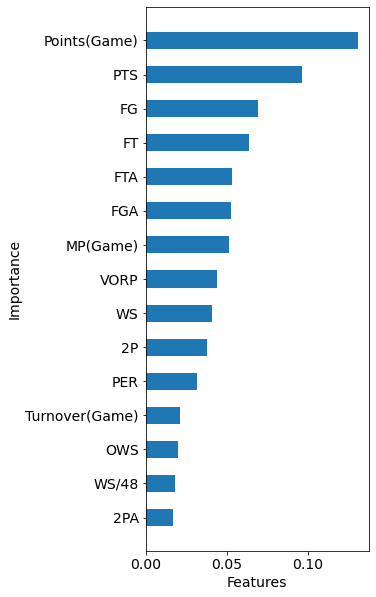

In [34]:
x = Top_15[1]
y = Top_15[0]

fig, ax = plt.subplots(figsize=(4, 10))
bars = ax.barh(x,y, 0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
#plt.xlim([550, 650])plt.show()
plt.gca().invert_yaxis()

plt.show()

#Top_15.plot.barh(x=Top_15[1], y=Top_15[0],title="Top 15 Features", color='green')


#df.plot.barh(x='Cuisine', y='Number of People',
  #           title='Cuisine Preference', color='green')

In [ ]:
#X = seasons_df.copy().drop()
#y = boston.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [6]:
#df_crypto_clean.drop("IsTrading", axis=1).copy()